In [106]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline 

In [107]:
batch_size=256
image_size=(100, 100)

In [109]:
train_dataset = image_dataset_from_directory(r'C:\Games\dataset\training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 300 files belonging to 10 classes.
Using 270 files for training.


In [111]:
validation_dataset = image_dataset_from_directory(r'C:\Games\dataset\training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 300 files belonging to 10 classes.
Using 30 files for validation.


In [112]:
class_names = train_dataset.class_names
class_names

['aqua',
 'black',
 'fuchsia',
 'gray',
 'lime',
 'olive',
 'purple',
 'red',
 'white',
 'yellow']

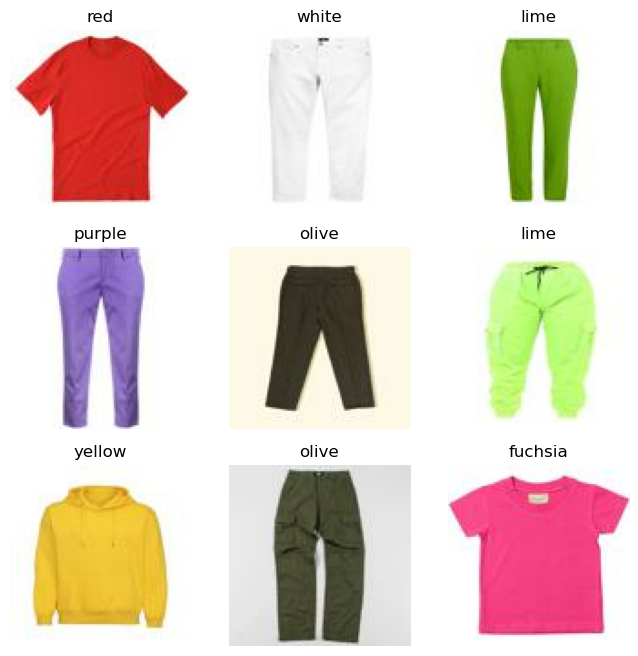

In [113]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [114]:
test_dataset = image_dataset_from_directory(r'C:\Games\dataset\test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 150 files belonging to 10 classes.


In [115]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [116]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(100, 100, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(131, activation='softmax'))

In [117]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [119]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=40,
                    verbose=2)

Epoch 1/40
2/2 - 2s - loss: 1.8452 - accuracy: 0.3852 - val_loss: 1.5014 - val_accuracy: 0.4667 - 2s/epoch - 803ms/step
Epoch 2/40
2/2 - 2s - loss: 1.5828 - accuracy: 0.4519 - val_loss: 1.4462 - val_accuracy: 0.5667 - 2s/epoch - 791ms/step
Epoch 3/40
2/2 - 2s - loss: 1.4469 - accuracy: 0.5370 - val_loss: 1.2705 - val_accuracy: 0.4333 - 2s/epoch - 788ms/step
Epoch 4/40
2/2 - 2s - loss: 1.2720 - accuracy: 0.5370 - val_loss: 0.8594 - val_accuracy: 0.6000 - 2s/epoch - 805ms/step
Epoch 5/40
2/2 - 2s - loss: 1.0444 - accuracy: 0.6111 - val_loss: 0.8454 - val_accuracy: 0.7333 - 2s/epoch - 804ms/step
Epoch 6/40
2/2 - 2s - loss: 1.2409 - accuracy: 0.5963 - val_loss: 0.9755 - val_accuracy: 0.6000 - 2s/epoch - 812ms/step
Epoch 7/40
2/2 - 2s - loss: 1.3106 - accuracy: 0.5481 - val_loss: 0.8918 - val_accuracy: 0.7667 - 2s/epoch - 796ms/step
Epoch 8/40
2/2 - 2s - loss: 1.3191 - accuracy: 0.6185 - val_loss: 0.8963 - val_accuracy: 0.7333 - 2s/epoch - 802ms/step
Epoch 9/40
2/2 - 2s - loss: 1.4326 - acc

In [120]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 0s 211ms/step - loss: 0.0567 - accuracy: 0.9867


In [121]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 98.6667


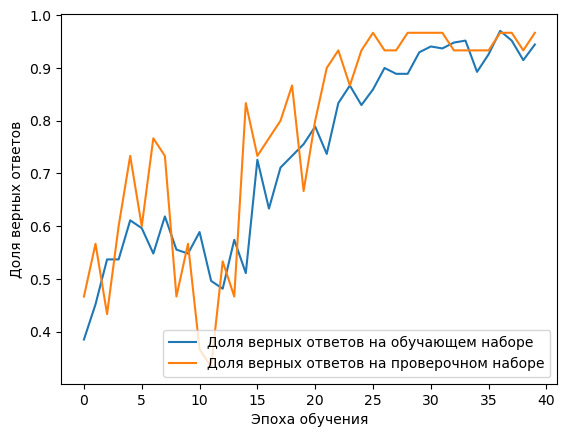

In [122]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

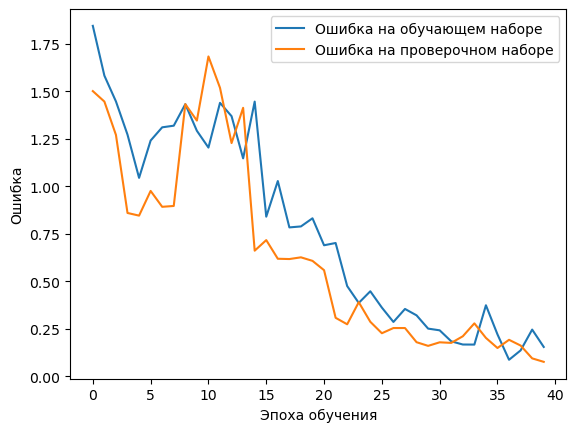

In [123]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [146]:
img_path = r'C:\Games\dataset\training\black\30.jpg'

img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [147]:
result = model.predict(img_array)

1/1 [==============================] - 0s 23ms/step


In [148]:
prediction = np.argmax(result)
print("Номер класса:", prediction)
print("Название класса:", class_names[prediction])

Номер класса: 1
Название класса: black


In [139]:
model.save("ppir.h5")